<a href="https://colab.research.google.com/github/JaynthReddy91/DL/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training shape: (54000, 784)
Testing shape: (6000, 784)
Iteration 1, loss = 0.54125506
Iteration 2, loss = 0.26261541
Iteration 3, loss = 0.21334693
Iteration 4, loss = 0.18041799
Iteration 5, loss = 0.15521071
Iteration 6, loss = 0.13713162
Iteration 7, loss = 0.12167082
Iteration 8, loss = 0.10957409
Iteration 9, loss = 0.09910434
Iteration 10, loss = 0.09005121
Iteration 11, loss = 0.08238981
Iteration 12, loss = 0.07590413
Iteration 13, loss = 0.06990400
Iteration 14, loss = 0.06552830
Iteration 15, loss = 0.06068202
Iteration 16, loss = 0.05696692
Iteration 17, loss = 0.05327114
Iteration 18, loss = 0.04979526
Iteration 19, loss = 0.04618848
Iteration 20, loss = 0.04420099
Iteration 21, loss = 0.04145133
Iteration 22, loss = 0.03863193
Iteration 23, loss = 0.03670778
Iteration 24, loss = 0.03395817
Iteration 25, loss = 0.03256089
Iteration 26, loss = 0.03003133
Iteration 27, loss = 0.02852477
Iteration 28, loss = 0.02670121
Iterat

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training set score: 0.9973703703703704
Testing set score: 0.9753333333333334
Predicted value: 6
Actual value: 6


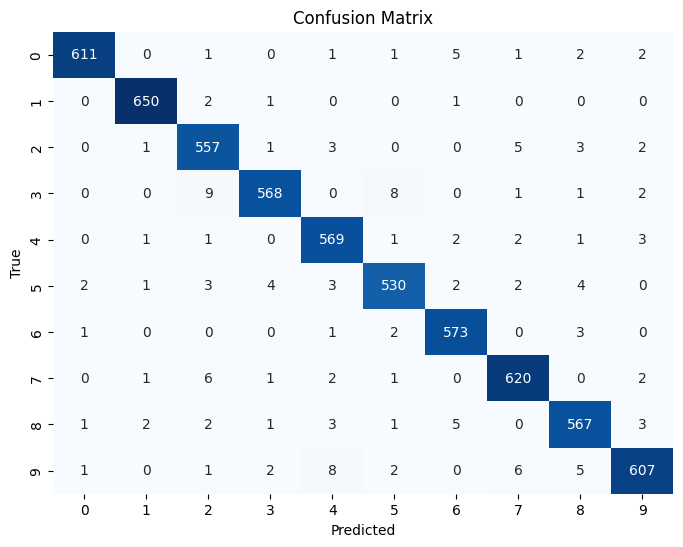

Iteration 1, loss = 0.58402398
Iteration 2, loss = 0.38397781
Iteration 3, loss = 0.39906015
Iteration 4, loss = 0.39794427
Iteration 5, loss = 0.42552618
Iteration 6, loss = 0.42483506
Iteration 7, loss = 0.43145128
Iteration 8, loss = 0.42965931
Iteration 9, loss = 0.48689868
Iteration 10, loss = 0.43131150
Iteration 11, loss = 0.44657347
Iteration 12, loss = 0.44554835
Iteration 13, loss = 0.43811670
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score (MLP2): 0.8982037037037037
Testing set score (MLP2): 0.8838333333333334


In [10]:
from sklearn.datasets import load_iris
# =========================
# Load MNIST dataset
# =========================
from tensorflow.keras.datasets import mnist

(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# =========================
# Normalize data
# =========================
X_train_full = X_train_full / 255.0
X_test_full  = X_test_full / 255.0

# =========================
# Flatten images (28x28 -> 784)
# =========================
X_train_full = X_train_full.reshape(-1, 28*28)
X_test_full  = X_test_full.reshape(-1, 28*28)

# =========================
# Train-validation split
# =========================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.10,
    random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# =========================
# Train MLP Classifier
# =========================
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=50,
    verbose=1,
    random_state=1
)

mlp.fit(X_train, y_train)

# =========================
# Accuracy
# =========================
print("Training set score:", mlp.score(X_train, y_train))
print("Testing set score:", mlp.score(X_test, y_test))

# =========================
# Test single sample
# =========================
index = 346
test_digit = X_test[index].reshape(1, 784)

prediction = mlp.predict(test_digit)[0]

print("Predicted value:", prediction)
print("Actual value:", y_test[index])

# =========================
# Confusion Matrix
# =========================
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

preds = mlp.predict(X_test)

cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# =========================
# MLP with higher learning rate
# =========================
mlp2 = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=50,
    verbose=1,
    random_state=1,
    learning_rate_init=0.1
)

mlp2.fit(X_train, y_train)

print("Training set score (MLP2):", mlp2.score(X_train, y_train))
print("Testing set score (MLP2):", mlp2.score(X_test, y_test))


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # As specified in the instructions
    random_state=42 # For reproducibility
)

# 3. Print the shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [17]:
from sklearn.neural_network import MLPClassifier

# Instantiate MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    verbose=1,
    random_state=1,
    learning_rate_init=0.01,
    max_iter=50  )


# Fit the MLPClassifier to the training data
mlp.fit(X_train, y_train)




print("Training set score (MLP):", mlp.score(X_train, y_train))
print("Testing set score (MLP):", mlp.score(X_test, y_test))

Iteration 1, loss = 0.28077467
Iteration 2, loss = 0.14260706
Iteration 3, loss = 0.10688985
Iteration 4, loss = 0.08823435
Iteration 5, loss = 0.07626404
Iteration 6, loss = 0.07058278
Iteration 7, loss = 0.06213399
Iteration 8, loss = 0.05774871
Iteration 9, loss = 0.05329417
Iteration 10, loss = 0.05305703
Iteration 11, loss = 0.05162682
Iteration 12, loss = 0.04896548
Iteration 13, loss = 0.04406829
Iteration 14, loss = 0.03798895
Iteration 15, loss = 0.04233534
Iteration 16, loss = 0.04080709
Iteration 17, loss = 0.04077413
Iteration 18, loss = 0.03761449
Iteration 19, loss = 0.03576851
Iteration 20, loss = 0.03669306
Iteration 21, loss = 0.03654641
Iteration 22, loss = 0.03425338
Iteration 23, loss = 0.03269334
Iteration 24, loss = 0.02981621
Iteration 25, loss = 0.03731037
Iteration 26, loss = 0.03027062
Iteration 27, loss = 0.03143538
Iteration 28, loss = 0.03685304
Iteration 29, loss = 0.03117113
Iteration 30, loss = 0.03670261
Iteration 31, loss = 0.03972243
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score (MLP): 0.9963333333333333
Testing set score (MLP): 0.9728333333333333


In [19]:
index = 10 # You can change this index to test different samples from X_test
single_sample_input = X_test[index].reshape(1, -1) # Reshape for single sample prediction

predicted_value = mlp.predict(single_sample_input)[0]
actual_value = y_test[index]

print(f"Input features: {X_test[index]}")
print(f"Predicted value: {predicted_value}")
print(f"Actual value: {actual_value}")

Input features: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.29411765
 0.69411765 0.8        0.7333333

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 1. Load the Iris dataset
iris =load_breast_cancer()
X = iris.data
y = iris.target

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # As specified in the instructions
    random_state=42 # For reproducibility
)

# 3. Print the shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Instantiate MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(70,50,30,),
    verbose=1,
    random_state=1,
    learning_rate_init=0.0009,
    max_iter=50  )


# Fit the MLPClassifier to the training data
mlp.fit(X_train, y_train)




print("Training set score (MLP):", mlp.score(X_train, y_train))
print("Testing set score (MLP):", mlp.score(X_test, y_test))
print("Accuracy:", accuracy_score(y_test, mlp.predict(X_test)))


Iteration 1, loss = 10.52930826
Iteration 2, loss = 5.36389504
Iteration 3, loss = 2.51671315
Iteration 4, loss = 1.24443457
Iteration 5, loss = 1.42524858
Iteration 6, loss = 0.87592969
Iteration 7, loss = 0.52392096
Iteration 8, loss = 0.27742942
Iteration 9, loss = 0.42707535
Iteration 10, loss = 0.28702901
Iteration 11, loss = 0.24558015
Iteration 12, loss = 0.26071116
Iteration 13, loss = 0.27522701
Iteration 14, loss = 0.28544659
Iteration 15, loss = 0.21963878
Iteration 16, loss = 0.27527723
Iteration 17, loss = 0.21985296
Iteration 18, loss = 0.21204084
Iteration 19, loss = 0.21029866
Iteration 20, loss = 0.19607347
Iteration 21, loss = 0.21049519
Iteration 22, loss = 0.20086598
Iteration 23, loss = 0.20025813
Iteration 24, loss = 0.20647933
Iteration 25, loss = 0.22498536
Iteration 26, loss = 0.20157674
Iteration 27, loss = 0.22108066
Iteration 28, loss = 0.22970054
Iteration 29, loss = 0.19884118
Iteration 30, loss = 0.19811801
Iteration 31, loss = 0.19380302
Iteration 32, lo